<a href="https://colab.research.google.com/github/Dohy-Lee/ML_DL.Basic/blob/main/9_2)IMDB_Review_classificaition_by_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import imdb
(train_input, train_target),(test_input, test_output) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape, test_input.shape) #개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열

(25000,) (25000,)


In [4]:
print(len(train_input[0]))#첫 번째 리뷰의 길이와 내용
print(train_input[0])

218
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[:20]) #리뷰가 긍정인지 부정인지 판단 → 이진 분류 문제로 해석할 수 있음

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state = 42)

In [7]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


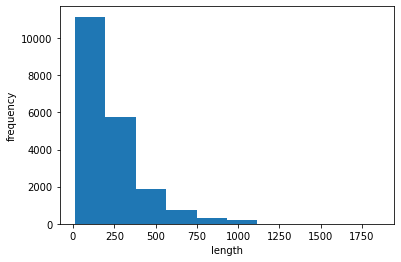

In [8]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100) #순차 데이터의 길이를 100으로 맞춤. 100보다 크면 자르고, 작으면 0으로 패딩
print(train_seq.shape) #샘플 개수 20000, 토큰(타임스텝) 개수 : 100

(20000, 100)


In [10]:
print(train_seq[0])
print(train_seq[0][-10:]) #원본의 앞부분이 잘림
                          #pad_sequences는 기본으로 maxlen보다 긴 시퀀스의 앞 부분을 자름. truncating을 post로 바꾸면 뒷 부분을 자름

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[  6   2  46   7  14  20  10  10 470 158]


In [11]:
print(train_seq[5]) #패딩역시 앞 부분에 추가. padding을 post로 바꾸면 뒷 부분에 패딩추가

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [12]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [13]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100,500)))#사용할 뉴런의 갯수 8, input_shape에는 사용할 뉴런 개수 지정, 기본 활성화 함수는 tanh, 샘플의 길이 100, 원-핫 인코딩으로 표현하려면 배열의 길이가 500(imdb.load_data에서 500개 단어를 사용하도록 지정하였음.)
model.add(keras.layers.Dense(1, activation='sigmoid'))
train_oh = keras.utils.to_categorical(train_seq) #to_categorical : 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환
print(train_oh.shape)
print(train_oh[0][0][:12]) #첫 번째 샘플의 첫 번째 토큰 10의 원-핫 인코딩
print(np.sum(train_oh[0][0])) #나머지 원소가 모두 0인지 확인

(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [14]:
val_oh = keras.utils.to_categorical(val_seq)#500(500차원의 원-핫 인코딩 배열) * 8(순환층의 뉴런 8개) = 4000 + 8(은닉상태크기)*8(뉴런 개수)  + 8(절편)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [18]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplearn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh,train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6976 - accuracy: 0.5042 - val_loss: 0.6970 - val_accuracy: 0.5108
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6934 - accuracy: 0.5166 - val_loss: 0.6943 - val_accuracy: 0.5216
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6902 - accuracy: 0.5278 - val_loss: 0.6916 - val_accuracy: 0.5302
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6868 - accuracy: 0.5437 - val_loss: 0.6886 - val_accuracy: 0.5452
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6823 - accuracy: 0.5631 - val_loss: 0.6834 - val_accuracy: 0.5612
Epoch 6/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6721 - accuracy: 0.5964 - val_loss: 0.6627 - val_accuracy: 0.6132
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6425 - accuracy: 0.6503 - val_loss: 0.6436 - val_ac

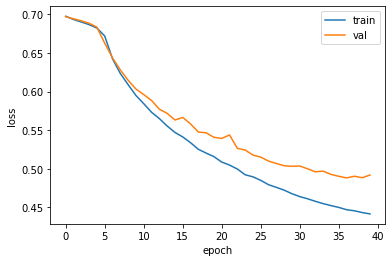

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [20]:
#원-핫 인코딩의 단점 : 입력 데이터가 엄청 커짐
print(train_seq.nbytes, train_oh.nbytes) #500차원으로 늘렸으므로 약 500배 커짐

8000000 4000000000


In [22]:
#단어 임베딩:각 단어를 고정된 크기의 실수 벡터로 변환, 입력을 정수 데이터로 받음
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))#어휘사전의 크기 500(imdb.load_data에서 num_words를 500으로 지정했음), 임베딩 벡터의 크기:16, 입력 시퀀스의 길이 100
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary() #입력으로 (100,)크기를 받고 (100,16)크기의 출력을 만듦
                #500개의 토큰 * 벡터의 크기 16 = 8000
                #SimpleRNN층 : 임베딩 벡터의 크기 16 * 8개의 뉴런 = 128, 은닉 상태에 곱해지는 가중치 8 * 8 = 64, 절편 8  = 200
                #Dense층 : 가중치 개수 9

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq,train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6954 - accuracy: 0.5016 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 2/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6903 - accuracy: 0.5334 - val_loss: 0.6904 - val_accuracy: 0.5326
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6867 - accuracy: 0.5603 - val_loss: 0.6879 - val_accuracy: 0.5456
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6825 - accuracy: 0.5785 - val_loss: 0.6853 - val_accuracy: 0.5544
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6758 - accuracy: 0.5961 - val_loss: 0.6735 - val_accuracy: 0.6064
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6455 - accuracy: 0.6754 - val_loss: 0.6356 - val_accuracy: 0.6884
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6092 - accuracy: 0.7218 - val_loss: 0.6002 - val_accuracy:

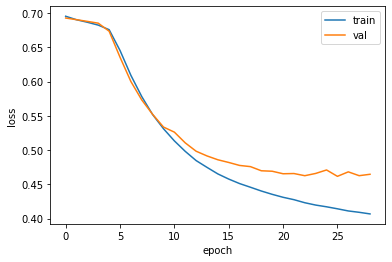

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()